In [1]:
import requests
cid = 1084527946
url='https://comment.bilibili.com/{}.xml'.format(cid)
# 爬取数据
rq=requests.get(url)    #此时rq为一个回应
rq.encoding='utf-8'
from bs4 import BeautifulSoup
import pandas as pd
columns = ['出现时间点', '模式', '字体', '颜色', '发送时间', '弹幕池', '用户ID', 'rowID','其他']   # 各列数据名称
soup = BeautifulSoup(rq.text, 'lxml')    # 解析网页内容
# 获取所有d标签
BT = soup.select("d")
BT

[<d p="1562.49500,5,25,16707842,1680968209,0,5fde76f7,1290813908881406464,10">三年才一个动皮，可不是“也就”吗，三年啊</d>,
 <d p="1559.13400,1,25,16777215,1680870223,0,7a386bc6,1289991950413577728,10">《也就》</d>,
 <d p="2.69900,1,25,16777215,1680964723,0,5064aa76,1290784667142117632,10">片头来自：哆啦a梦 大雄的新恐龙</d>,
 <d p="699.17700,5,25,15138834,1680935267,0,44bc02e2,1290537571684171520,10">菜鸟驿站不亏</d>,
 <d p="32.19900,5,25,16707842,1680934142,0,c70bae47,1290528138241223680,10">大疫不过三年</d>,
 <d p="527.39600,5,25,16777215,1680915969,0,f5d1d9d9,1290375691346749440,10">对味了✓</d>,
 <d p="1333.39400,5,25,16707842,1680895967,0,ab098ba0,1290207899263576832,10">能被来刀狠的，不亏</d>,
 <d p="1435.90300,5,25,16777215,1680894728,0,fe8d6148,1290197506684440576,10">大小乔你们也不想东吴将士受伤的吧？</d>,
 <d p="1628.62500,5,25,15138834,1680885784,0,9585370e,1290122484066301952,10">动态那么便宜啊</d>,
 <d p="888.36100,5,25,15138834,1680884357,0,a69510c5,1290110511417378048,10">购卡:哼!先让你得意几天</d>,
 <d p="947.60200,5,25,15138834,1680864817,0,a9ef3fa9,12899466000048

In [2]:
# 遍历所有d标签获取文字
pl = [i.text for i in BT]
zda = {}
for i in range(len(columns)):
    # 将d标签内的p数据分割
    zda[columns[i]] = [j['p'].split(',')[i] for j in BT]
zda['弹幕内容'] = pl
# 做成DataFrame
data = pd.DataFrame(zda)
# 保存
data.to_csv('d:/aa/骠骑大将军.csv',index=None, encoding='utf-8-sig')    # 注意弹幕数据必须用'utf-8-sig'编码，追加可加属性 mode='a'
data

,出现时间点,模式,字体,颜色,发送时间,弹幕池,用户ID,rowID,其他,弹幕内容
0,1562.49500,5,25,16707842,1680968209,0,5fde76f7,1290813908881406464,10,三年才一个动皮，可不是“也就”吗，三年啊
1,1559.13400,1,25,16777215,1680870223,0,7a386bc6,1289991950413577728,10,《也就》
2,2.69900,1,25,16777215,1680964723,0,5064aa76,1290784667142117632,10,片头来自：哆啦a梦 大雄的新恐龙
3,699.17700,5,25,15138834,1680935267,0,44bc02e2,1290537571684171520,10,菜鸟驿站不亏
4,32.19900,5,25,16707842,1680934142,0,c70bae47,1290528138241223680,10,大疫不过三年
...,...,...,...,...,...,...,...,...,...,...
3484,629.89700,1,25,16777215,1680789112,0,3402fc5d,1289311538834052352,1,？
3485,557.75800,1,25,16707842,1680784411,0,ff4f6fb2,1289272100607156224,1,3
3486,485.35800,1,25,16707842,1680784336,0,ff4f6fb2,1289271475228258816,1,2
3487,468.51800,1,25,16707842,1680784316,0,ff4f6fb2,1289271306306554112,1,1


In [5]:
#读取文件，分词+去停用词
import jieba
import pandas as pd
comments=pd.read_csv('d:/aa/骠骑大将军.csv')
# comments
com_cut=comments["弹幕内容"].apply(jieba.lcut)  # apply是对每行操作
print(com_cut)      #com_cut为 pandas系列
# com_cut为分词后的结果，每行都是一个分词列表

#去停用词
with open('d:/aa/stop.txt',encoding='utf-8') as f:
    stop_words=f.read()            #stop_words为字符串 str
# print(type(stop_words))

stop_words+='\n'  #添加一个停用词
#  在x中，不在stop_words中则保留
keep = lambda x:[i for i in x if i not in stop_words ]  #自定义lambda函数
com_clear=com_cut.apply(keep)   #因为com_cut是pandas中的一列，不能这样用com_clear=keep(com_cut)，一定要用 apply这种方式
        
print(com_clear)  #com_clear为去除停用词之后的结果

0       [三年, 才, 一个, 动皮, ，, 可不是, “, 也, 就, ”, 吗, ，, 三年, 啊]
1                                           [《, 也, 就, 》]
2               [片头, 来自, ：, 哆, 啦, a, 梦,  , 大雄, 的, 新, 恐龙]
3                                           [菜鸟, 驿站, 不亏]
4                                           [大疫, 不过, 三年]
                              ...                       
3484                                                 [？]
3485                                                 [3]
3486                                                 [2]
3487                                                 [1]
3488                                           [?, ?, ?]
Name: 弹幕内容, Length: 3489, dtype: object
0           [三年, 动皮, 可不是, 三年]
1                          []
2       [片头, 哆, a, 梦, 大雄, 恐龙]
3                [菜鸟, 驿站, 不亏]
4                    [大疫, 三年]
                ...          
3484                       []
3485                       []
3486                       []
3487                       []
3488                       []
Nam

In [7]:
# 遍历整个去除停用词之后的结果将空列表去除
lista = [i for i in com_clear if i != []]
lista

[['三年', '动皮', '可不是', '三年'],
 ['片头', '哆', 'a', '梦', '大雄', '恐龙'],
 ['菜鸟', '驿站', '不亏'],
 ['大疫', '三年'],
 ['对味', '✓'],
 ['刀', '狠', '不亏'],
 ['大小', '乔', '不想', '东吴', '将士', '受伤'],
 ['动态', '便宜'],
 ['购卡', '得意', '几天'],
 ['大魏', '蓝高达', '皮肤', '不亏'],
 ['武将', '史诗', '皮肤', '不亏'],
 ['出金', '血亏'],
 ['兀', '吃', '一箭'],
 ['传下去', '主是'],
 ['张飞', '烂死', '涿', '郡', '算了'],
 ['导航', '栏'],
 ['斩', '江东', '翼德'],
 ['不错'],
 ['野生', '统计', '君'],
 ['隐忍', '三年', '今日', '✓', '✓', '✓', '✓'],
 ['如你所愿'],
 ['曹操', '金皮', '亏上', '加亏'],
 ['念', '神魔', '不亏'],
 ['发挥'],
 ['接受'],
 ['精准', '降落', '失手'],
 ['食'],
 ['那位', '将军', '拿下', '此贼'],
 ['东', '吴大帝', '不亏'],
 ['一念', '牛', '魔'],
 ['不亏', '不亏', '不亏'],
 ['亏了'],
 ['血亏', '血亏'],
 ['血亏', '托'],
 ['血亏'],
 ['亏了'],
 ['王姨', '不亏'],
 ['woc'],
 ['举办'],
 ['纯路', '皮肤', '杨寿'],
 ['哪位', '将军', '拿下', '此贼'],
 ['白板', '骠骑'],
 ['好拉'],
 ['小宝', '不亏'],
 ['四世', '三公', '不亏'],
 ['狗贼', '吾', '誓', '杀'],
 ['狗', '托'],
 ['味儿', '太对', '这才', 'GK'],
 ['舒服'],
 ['舒服'],
 ['爆率', '太'],
 ['白板', '将军', '实名', '观看'],
 ['byd'],
 ['节日', '动皮', '假动皮', '攻击', '特

In [8]:
# 将二维列表转化成一维列表
lista = [j for i in lista for j in i]
# 统计
word_yun1 = pd.value_counts(lista)
word_yun1

不亏     485
血亏     190
狗托     105
托       66
将军      57
      ... 
劝        1
最牛       1
唧唧       1
八格       1
十三万      1
Length: 1778, dtype: int64

(-0.5, 499.5, 363.5, -0.5)

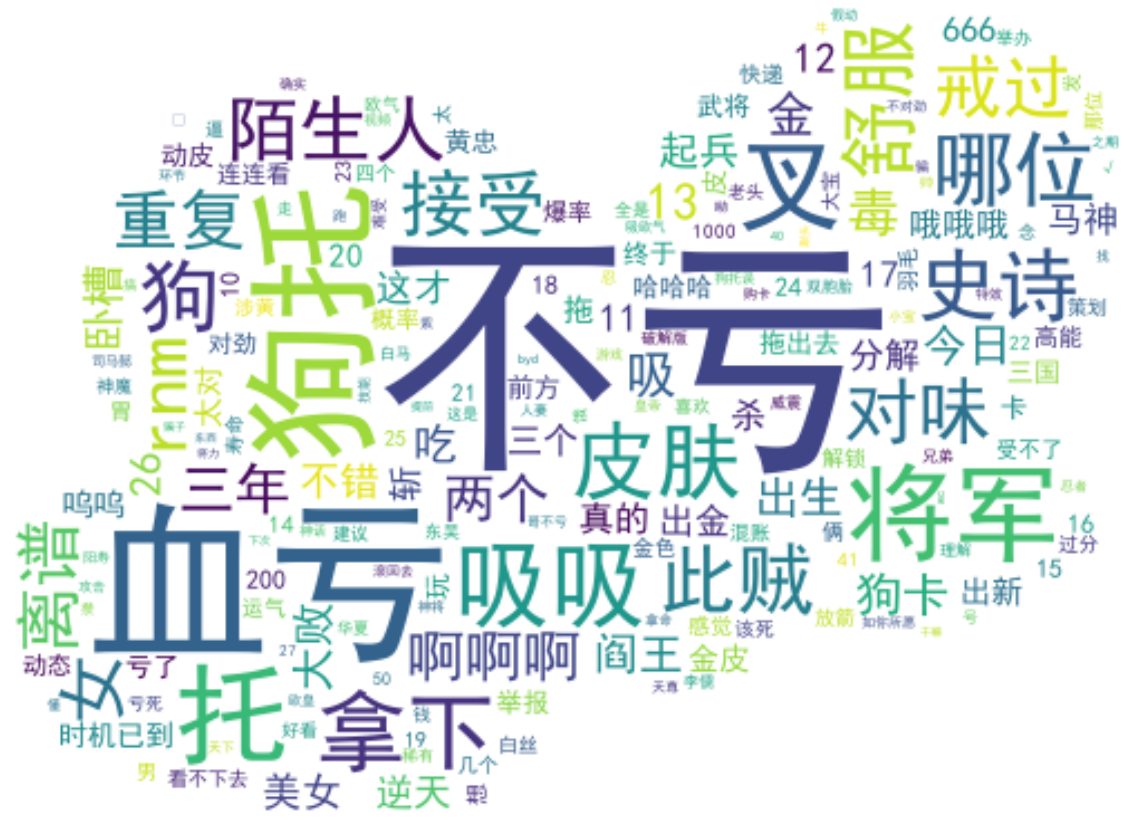

In [9]:
#绘制词云图
import matplotlib.pyplot as plt
from wordcloud import WordCloud
pic=plt.imread("d:/aa/心.jpg")

#字体：simfang.ttf   simhei.TTF
word_cloud=WordCloud(mask=pic,background_color='white', width=1024, height=768, font_path=u"c:/windows/fonts/simhei.TTF")

word_cloud.fit_words(word_yun1)

plt.figure(figsize=(20,20))  #单位为英寸

plt.imshow(word_cloud,interpolation='bilinear') #双线性插值法显示

plt.axis("off")  #不显示坐标轴

In [10]:
# 将发送时间以秒为单位新建datetime为出现时间列
comments['出现时间'] = pd.to_datetime(comments['发送时间'],unit='s') 
# 按星期
comments['出现时间s'] = comments['出现时间'].dt.dayofweek 
lista = comments['出现时间s'].value_counts() # 统计
lista = lista.sort_index()  #按index索引排序
lista

0     206
1     206
2     150
3     345
4    1179
5     848
6     555
Name: 出现时间s, dtype: int64

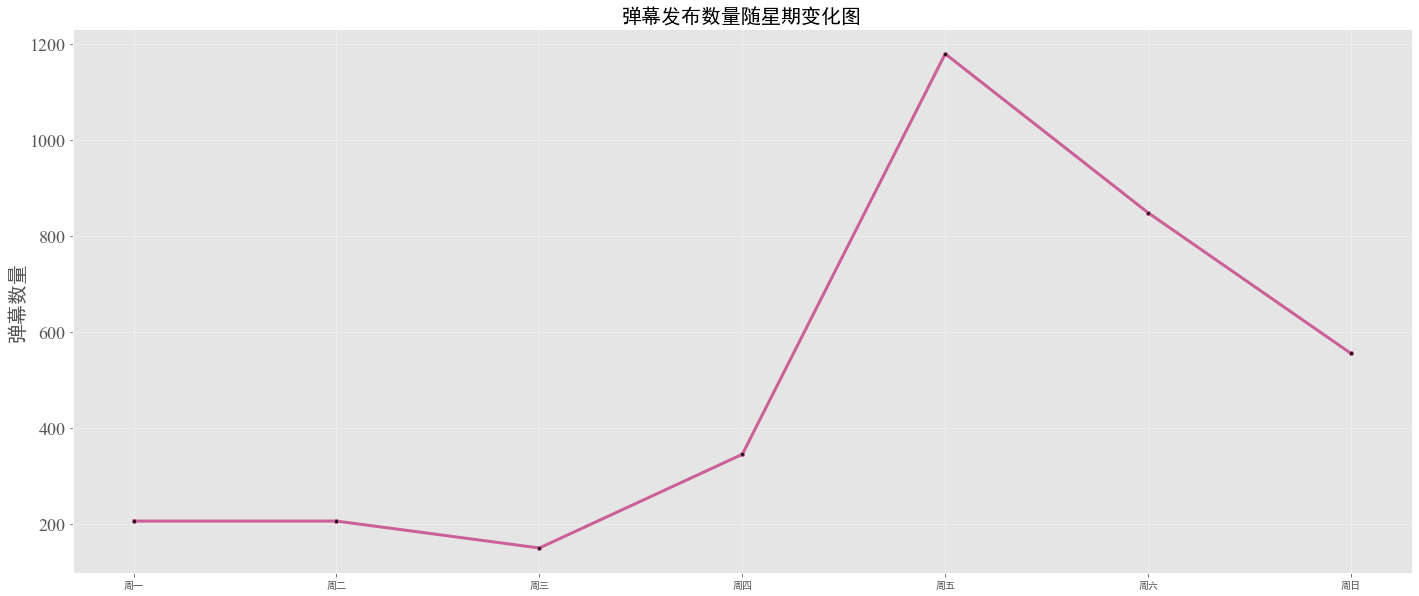

In [11]:
import matplotlib.pyplot as plt

# 以下2句显示中文时才需要
plt.rcParams['font.sans-serif'] = 'SimHei'    #默认字体，黑体 
plt.rcParams['axes.unicode_minus'] = False    #正负号正常显示
# 指定画布
plt.figure(figsize=(24, 10))              #默认单位为英寸
plt.style.use("ggplot")  #风格


week=["周一","周二","周三","周四","周五","周六","周日"]
plt.grid(True, linewidth = "0.5", linestyle = "--")

plt.plot(week, lista.values,  #折线图
         linewidth="3",
         marker="o",
         markersize="4",
         markerfacecolor="black",
         color="#CB5F97")  

plt.yticks(fontproperties = 'Times New Roman', size = 18)
plt.ylabel('弹幕数量',size =20)
plt.title('弹幕发布数量随星期变化图',size =20)
plt.show()
